Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['YEAR', 'Month', 'Day', 'temperature', 'Humidity', 'Rainfall (mm/day)',
       'wind direction', 'CN', 'INFILTRATION', 'RUNOFF(mm/day)', 'Runoff%',
       'Dams'],
      dtype='object')
['POWER_Point_Daily_20190101_20231231_032d5707N_035d7664E_LST-Comma.csv', 'POWER_Point_Daily_20190101_20231231_032d5707N_035d7664E_LST-Comma-dataonly.csv', 'harvistingDataUpdated.csv']
Epoch 1/50
1314/1314 [==============================] - 5s 3ms/step - loss: 0.5110 - accuracy: 0.7709 - val_loss: 0.1778 - val_accuracy: 0.9247
Epoch 2/50
1314/1314 [==============================] - 4s 3ms/step - loss: 0.1791 - accuracy: 0.9323 - val_loss: 0.1087 - val_accuracy: 0.9384
Epoch 3/50
1314/1314 [==============================] - 3s 2ms/step - loss: 0.1173 - accuracy: 0.9589 - val_loss: 0.1060 - val_accuracy: 0.9452
Epoch 4/50
1314/1314 [==============================] - 4s 3m

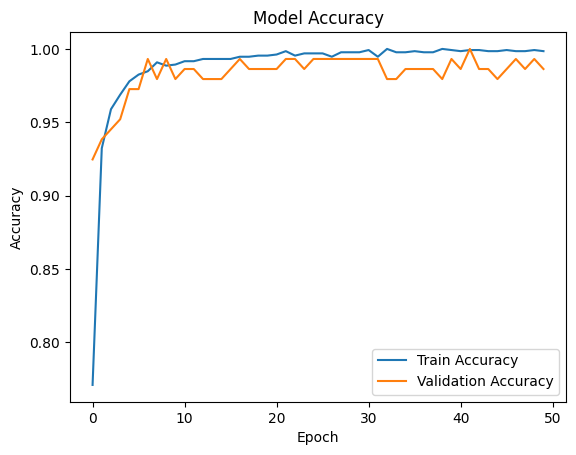

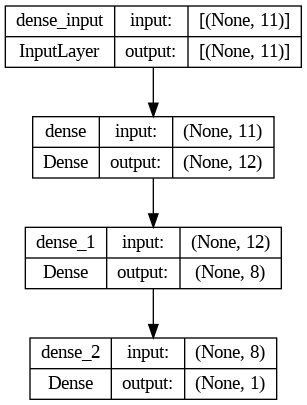

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from google.colab import drive

# Mount Google Drive to access the dataset
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/yousef/SCS-CN-GIS/harvistingDataUpdated.csv'
df = pd.read_csv(file_path)
print(df.columns)
import os

# Assuming you've correctly mounted your Google Drive
folder_path = '/content/drive/My Drive/yousef/SCS-CN-GIS/'
print(os.listdir(folder_path))

# Preprocessing
X = df.drop('Dams', axis=1)
y = df['Dams']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Define the model with a class weight parameter to handle class imbalance
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model with class weight parameter
class_weights = {0: 1, 1: (len(y) - y.sum()) / y.sum()}
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1, validation_split=0.1, class_weight=class_weights)

# Evaluate the model
predictions = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Plot model architecture (optional)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


3.141592653589793
